In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

Using TensorFlow backend.


In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
SIZE = 299  #Resize images

In [5]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for folder in os.listdir('train'):
    for file in os.listdir(os.path.join('train', folder)):
        if (file.endswith("JPG") or file.endswith("jpg")):
            train_labels.append(folder)
            img = cv2.imread(os.path.join('train', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            train_images.append(im)
        else:
            continue

        #Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
print('train images shape =',train_images.shape)
print('train labels shape =',train_labels.shape)

train images shape = (3417, 299, 299, 3)
train labels shape = (3417,)


In [7]:
test_images = []
test_labels = [] 

for folder in os.listdir('test'):
    for file in os.listdir(os.path.join('test', folder)):
        if (file.endswith("JPG") or file.endswith("jpg")):
            test_labels.append(folder)
            img = cv2.imread(os.path.join('test', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            test_images.append(im)
        else:
            continue


        #Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print('test images shape =',test_images.shape)
print('test labels shape =',test_labels.shape)

test images shape = (770, 299, 299, 3)
test labels shape = (770,)


In [8]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
#it make the data calass name to numerical formate like 1,2,3,4 for calculation purpose

In [9]:
#One hot encode y values for neural network. make tahe numamic class in a matrix
from keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(train_labels_encoded)
y_test_one_hot = to_categorical(test_labels_encoded)

In [10]:
X_train, X_test, y_train, y_test = train_images, test_images,y_train_one_hot, y_test_one_hot

In [11]:
# Normalize pixel values to between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [12]:
####################################################################
#                  XCEPTION                                        #
####################################################################

In [13]:
###########################################################################################################

model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

############################################################################################################

In [14]:
# don't train existing weights
for layer in model.layers:
    layer.trainable = False

In [15]:
# our layers - you can add more if you want
x = Flatten()(model.output)

In [16]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [17]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [20]:
batch_size=64
epochs=64
history = model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_test,y_test),
    verbose=1
)

  ...
    to  
  ['...']
Train for 54 steps, validate on 770 samples
Epoch 1/64
54/54 [==============================] - 79s 1s/step - loss: 3.0290 - accuracy: 0.7155 - val_loss: 2.7217 - val_accuracy: 0.7286
Epoch 2/64
54/54 [==============================] - 62s 1s/step - loss: 1.1692 - accuracy: 0.8387 - val_loss: 1.5326 - val_accuracy: 0.8156
Epoch 3/64
54/54 [==============================] - 63s 1s/step - loss: 1.2228 - accuracy: 0.8466 - val_loss: 2.9929 - val_accuracy: 0.7519
Epoch 4/64
54/54 [==============================] - 63s 1s/step - loss: 1.1169 - accuracy: 0.8586 - val_loss: 2.6832 - val_accuracy: 0.7818
Epoch 5/64
54/54 [==============================] - 63s 1s/step - loss: 1.3218 - accuracy: 0.8595 - val_loss: 1.9736 - val_accuracy: 0.8039
Epoch 6/64
54/54 [===========

In [21]:
model.save('version1_Xception.h5')

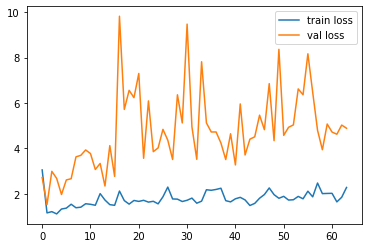

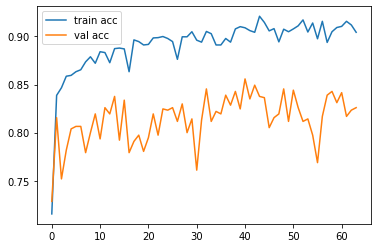

<Figure size 432x288 with 0 Axes>

In [22]:
r=history
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
prediction = model.predict(X_test)

In [24]:
predict=[]
import numpy as np 
i=0

for i in range(len(prediction)):
    
    maxElement = np.amax(prediction[i])
    if(prediction[i][0]==maxElement):
        predict.append('Blight')
        
    elif(prediction[i][1]==maxElement):
        predict.append('Common_Rust')
        
    elif(prediction[i][2]==maxElement):
        predict.append('Gray_Leaf_Spot')
    else:
      predict.append('Healthy')
predict = np.array(predict)
predict.shape

(770,)

In [25]:
original=[]
import numpy as np 

for i in range(len(y_test)):
    
    maxElement = np.amax(y_test[i])
    if(y_test[i][0]==maxElement):
        original.append('Blight')
        
    elif(y_test[i][1]==maxElement):
        original.append('Common_Rust')
        
    elif(y_test[i][2]==maxElement):
        original.append('Gray_Leaf_Spot')
    else:
      original.append('Healthy')
original = np.array(original)
original.shape

(770,)

In [26]:
true = 0
false = 0
for i in range(len(y_test)):
    if(predict[i]==original[i]):
        true=true+1
    else:
        false=false+1
        
print('true =',true)
print('false=',false)

true = 636
false= 134


In [27]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(original, predict))

Accuracy =  0.825974025974026


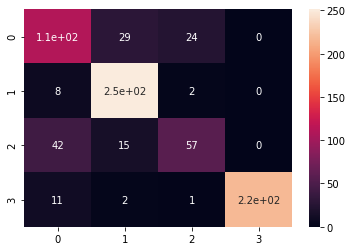

In [28]:
import seaborn as sns
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, predict)
#print(cm)
sns.heatmap(cm, annot=True)

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
target_names = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
print("Classification Report: \n",classification_report(original, predict, target_names=target_names))

Classification Report: 
                 precision    recall  f1-score   support

        Blight       0.64      0.67      0.66       163
   Common_Rust       0.85      0.96      0.90       261
Gray_Leaf_Spot       0.68      0.50      0.58       114
       Healthy       1.00      0.94      0.97       232

      accuracy                           0.83       770
     macro avg       0.79      0.77      0.78       770
  weighted avg       0.82      0.83      0.82       770



In [30]:

print('[')

for i in range(770):
	print("[%f,%f,%f,%f]," % (prediction[i][0],prediction[i][1],prediction[i][2],prediction[i][3]))
 

print(']')

[
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[0.997226,0.002774,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[0.000000,1.000000,0.000000,0.000000],
[0.722447,0.000000,0.277553,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[0.000000,0.000000,1.000000,0.000000],
[0.000000,1.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[0.993143,0.000000,0.006857,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[0.000000,1.000000,0.000000,0.000000],
[1.000000,0.000000,0.000000,0.000000],
[0.999292,0.000708,0.000000,0.000000],
[0.000000,1.000000,0.000000,0.000000],
[0.000000,1.000000,0.00